# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Pandas (4)</p>

<div class="alert alert-block alert-info alert">
    
# <span style=" color:red"> Groupby Operations and Multi-level Index

## Table of Contents
* How can we use groupby() method?
* groupby()
* cross-section: xs()
* swaplevel()
* sort_index()
* agg()

## How can we use groupby() method?

* A **groupby()** operation allows us to examine data on a **per category** basis. 
* We can use it to answer such questions: "What's the average per category" or "How many rows do we have per category?"
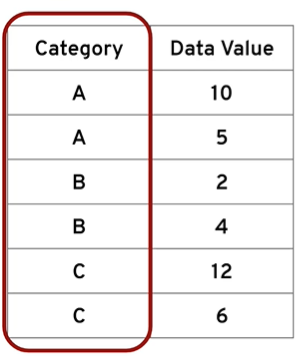
* We need to choose a categorical column to call with **groupby**
* Categorical columns are non-continuous.
* But they can still be numerical showing categories, such as cabin class categories on a ship or different years.
* It goups the data according to categories
  
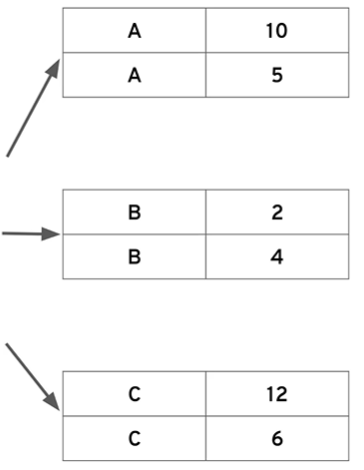
* If we use an aggregate function (sum, mean, count, etc.) together with groupby...

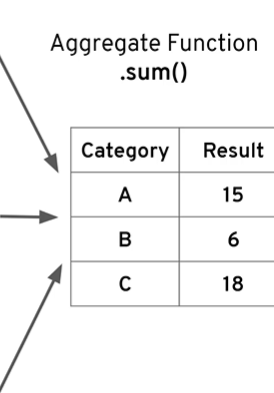
* Note that calling **groupby()** by itself creates a "lazy" groupby object waiting to be evaluated by an aggregate method call.
* There are multiple ways to split data like:

  obj.groupby("key")

  obj.groupby("key", axis=1)

  obj.groupby(["key1", "key2"])])
  

## Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("mpg.csv")
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

## groupby()

In [3]:
# We can use "describe()" to see all values in aggretaion functions
df.groupby("model_year").describe().T # It is easy to read with transpose

model_year                   70           71           72           73  \
mpg          count    29.000000    28.000000    28.000000    40.000000   
             mean     17.689655    21.250000    18.714286    17.100000   
             std       5.339231     6.591942     5.435529     4.700245   
             min       9.000000    12.000000    11.000000    11.000000   
             25%      14.000000    15.500000    13.750000    13.000000   
             50%      16.000000    19.000000    18.500000    16.000000   
             75%      22.000000    27.000000    23.000000    20.000000   
             max      27.000000    35.000000    28.000000    29.000000   
cylinders    count    29.000000    28.000000    28.000000    40.000000   
             mean      6.758621     5.571429     5.821429     6.375000   
             std       1.724926     1.665079     2.073708     1.807215   
             min       4.000000     4.000000     3.000000     3.000000   
             25%       6.000000     4.000000     4.000000     4.000000   
             50%       8.000000     6.000000     4.000000     7.000000   
             75%       8.000000     6.500000     8.000000     8.000000   
             max       8.000000     8.000000     8.000000     8.000000   
displacement count    29.000000    28.000000    28.000000    40.000000   
             mean    281.413793   209.750000   218.375000   256.875000   
             std     124.421380   115.102410   123.781964   121.722085   
             min      97.000000    71.000000    70.000000    68.000000   
             25%     198.000000    97.750000   109.250000   121.750000   
             50%     307.000000   228.500000   131.000000   276.000000   
             75%     383.000000   273.000000   326.000000   350.250000   
             max     455.000000   400.000000   429.000000   455.000000   
weight       count    29.000000    28.000000    28.000000    40.000000   
             mean   3372.793103  2995.428571  3237.714286  3419.025000   
             std     852.868663  1061.830859   974.520960   974.809133   
             min    1835.000000  1613.000000  2100.000000  1867.000000   
             25%    2648.000000  2110.750000  2285.500000  2554.500000   
             50%    3449.000000  2798.000000  2956.000000  3338.500000   
             75%    4312.000000  3603.250000  4169.750000  4247.250000   
             max    4732.000000  5140.000000  4633.000000  4997.000000   
acceleration count    29.000000    28.000000    28.000000    40.000000   
             mean     12.948276    15.142857    15.125000    14.312500   
             std       3.330982     2.666171     2.850032     2.754222   
             min       8.000000    11.500000    11.000000     9.500000   
             25%      10.000000    13.375000    13.375000    12.500000   
             50%      12.500000    14.500000    14.500000    14.000000   
             75%      15.000000    16.125000    16.625000    16.000000   
             max      20.500000    20.500000    23.500000    21.000000   
origin       count    29.000000    28.000000    28.000000    40.000000   
             mean      1.310345     1.428571     1.535714     1.375000   
             std       0.603765     0.741798     0.792658     0.667467   
             min       1.000000     1.000000     1.000000     1.000000   
             25%       1.000000     1.000000     1.000000     1.000000   
             50%       1.000000     1.000000     1.000000     1.000000   
             75%       1.000000     2.000000     2.000000     2.000000   
             max       3.000000     3.000000     3.000000     3.000000   

model_year                   74           75           76           77  \
mpg          count    27.000000    30.000000    34.000000    28.000000   
             mean     22.703704    20.266667    21.573529    23.375000   
             std       6.420010     4.940566     5.889297     6.675862   
             min      13.000000    13.000000    13.000000    15.000000   
   

#### Q1: How performance of the cars has changed throughout the years?

What is the categorical column in this question?

In [4]:
# The categoical column here is model_year. Let's look at its categoories.
df["model_year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [5]:
# Or we could use value_counts
df["model_year"].value_counts()

model_year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: count, dtype: int64

In [6]:
# Let's use group_by to find the mean of all numerical columns
df.groupby("model_year").mean("mpg")  # empty mean() gave error, that's why I wrote "mpg" inside the paranthesis

# model_year is our index now

mpg  cylinders  displacement       weight  acceleration  \
model_year                                                                  
70          17.689655   6.758621    281.413793  3372.793103     12.948276   
71          21.250000   5.571429    209.750000  2995.428571     15.142857   
72          18.714286   5.821429    218.375000  3237.714286     15.125000   
73          17.100000   6.375000    256.875000  3419.025000     14.312500   
74          22.703704   5.259259    171.740741  2877.925926     16.203704   
75          20.266667   5.600000    205.533333  3176.800000     16.050000   
76          21.573529   5.647059    197.794118  3078.735294     15.941176   
77          23.375000   5.464286    191.392857  2997.357143     15.435714   
78          24.061111   5.361111    177.805556  2861.805556     15.805556   
79          25.093103   5.827586    206.689655  3055.344828     15.813793   
80          33.696552   4.137931    115.827586  2436.655172     16.934483   
81          30.334483   4.620690    135.310345  2522.931034     16.306897   
82          31.709677   4.193548    128.870968  2453.548387     16.638710   

              origin  
model_year            
70          1.310345  
71          1.428571  
72          1.535714  
73          1.375000  
74          1.666667  
75          1.466667  
76          1.470588  
77          1.571429  
78          1.611111  
79          1.275862  
80          2.206897  
81          1.965517  
82          1.645161

In [7]:
# I want to display only mpg column together with model_year
df.groupby("model_year")["mpg"].mean()

# df.groupby("model_year").mean()["mpg"] # This code gave error

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

In [8]:
# sum grouped by horsepower
df.groupby(['horsepower']).sum()

mpg  cylinders  displacement  weight  acceleration  model_year  \
horsepower                                                                     
100         333.1         97        3731.0   53456         269.3        1268   
102          20.0          4         130.0    3150          15.7          76   
103          20.3          5         131.0    2830          15.9          78   
105         246.0         70        2780.0   40492         199.5         916   
107          21.0          6         155.0    2472          14.0          73   
...           ...        ...           ...     ...           ...         ...   
95          309.6         70        2328.0   39258         225.0        1035   
96           81.5         12         400.0    7667          42.9         234   
97          199.1         41        1183.0   23148         134.1         671   
98           40.5         10         371.0    6470          33.5         152   
?           168.0         26         774.0   15016         103.9         468   

            origin                                               name  
horsepower                                                             
100             21  amc gremlinchevrolet chevelle malibuamc matado...  
102              2                                          volvo 245  
103              2                                          audi 5000  
105             12  plymouth satellite customplymouth valiantplymo...  
107              1                                   mercury capri v6  
...            ...                                                ...  
95              26  toyota corona mark iiplymouth dustersaab 99eto...  
96               7     toyota coronaplymouth arrow gstoyota celica gt  
97              23  amc hornetmazda rx2 coupetoyouta corona mark i...  
98               3                            volvo 244dlford granada  
?                8  ford pintoford maverickrenault lecar deluxefor...  

[94 rows x 8 columns]

In [9]:
# min values grouped by cylinders
df.groupby(['cylinders']).min()

mpg  displacement horsepower  weight  acceleration  model_year  \
cylinders                                                                    
3          18.0          70.0        100    2124          12.5          72   
4          18.0          68.0        100    1613          11.6          70   
5          20.3         121.0        103    2830          15.9          78   
6          15.0         145.0        100    2472          11.3          70   
8           9.0         260.0        105    3086           8.0          70   

           origin                     name  
cylinders                                   
3               3                maxda rx3  
4               1              amc concord  
5               2                audi 5000  
6               1              amc concord  
8               1  amc ambassador brougham

In [10]:
# using groupby function with "sort"
 
df.groupby(['cylinders'], sort = False).sum() # No sorting in cylinders

mpg  displacement  \
cylinders                         
8          1541.2       35536.0   
4          5974.5       22398.5   
6          1678.8       18324.0   
3            82.2         290.0   
5            82.1         435.0   

                                                  horsepower  weight  \
cylinders                                                              
8          1301651501501401982202152251901701601502252152...  423816   
4          958846879095113889095?728690707665696070958054...  470858   
6          9597859010010510088100110100881051001008895100...  268651   
3                                                 9790110100    9594   
5                                                    1037767    9310   

           acceleration  model_year  origin  \
cylinders                                     
8                1334.4        7612     103   
4                3386.7       15723     405   
6                1366.1        6378     100   
3                  53.0         302      12   
5                  55.9         237       6   

                                                        name  
cylinders                                                     
8          chevrolet chevelle malibubuick skylark 320plym...  
4          toyota corona mark iidatsun pl510volkswagen 11...  
6          plymouth dusteramc hornetford maverickamc grem...  
3            mazda rx2 coupemaxda rx3mazda rx-4mazda rx-7 gs  
5             audi 5000mercedes benz 300daudi 5000s (diesel)

In [11]:
# sort= True
df.groupby(['cylinders'], sort = True).sum() # Begins from the least (from 3 to 8)

mpg  displacement  \
cylinders                         
3            82.2         290.0   
4          5974.5       22398.5   
5            82.1         435.0   
6          1678.8       18324.0   
8          1541.2       35536.0   

                                                  horsepower  weight  \
cylinders                                                              
3                                                 9790110100    9594   
4          958846879095113889095?728690707665696070958054...  470858   
5                                                    1037767    9310   
6          9597859010010510088100110100881051001008895100...  268651   
8          1301651501501401982202152251901701601502252152...  423816   

           acceleration  model_year  origin  \
cylinders                                     
3                  53.0         302      12   
4                3386.7       15723     405   
5                  55.9         237       6   
6                1366.1        6378     100   
8                1334.4        7612     103   

                                                        name  
cylinders                                                     
3            mazda rx2 coupemaxda rx3mazda rx-4mazda rx-7 gs  
4          toyota corona mark iidatsun pl510volkswagen 11...  
5             audi 5000mercedes benz 300daudi 5000s (diesel)  
6          plymouth dusteramc hornetford maverickamc grem...  
8          chevrolet chevelle malibubuick skylark 320plym...

In [12]:
# Selecting a single group (choose one category from the grouped by feature)
# In "model year", bring only "70" category (it is not string, so we do not use "")
 
grp = df.groupby('model_year')
grp.get_group(70)

mpg  cylinders  displacement horsepower  weight  acceleration  \
0   18.0          8         307.0        130    3504          12.0   
1   15.0          8         350.0        165    3693          11.5   
2   18.0          8         318.0        150    3436          11.0   
3   16.0          8         304.0        150    3433          12.0   
4   17.0          8         302.0        140    3449          10.5   
5   15.0          8         429.0        198    4341          10.0   
6   14.0          8         454.0        220    4354           9.0   
7   14.0          8         440.0        215    4312           8.5   
8   14.0          8         455.0        225    4425          10.0   
9   15.0          8         390.0        190    3850           8.5   
10  15.0          8         383.0        170    3563          10.0   
11  14.0          8         340.0        160    3609           8.0   
12  15.0          8         400.0        150    3761           9.5   
13  14.0          8         455.0        225    3086          10.0   
14  24.0          4         113.0         95    2372          15.0   
15  22.0          6         198.0         95    2833          15.5   
16  18.0          6         199.0         97    2774          15.5   
17  21.0          6         200.0         85    2587          16.0   
18  27.0          4          97.0         88    2130          14.5   
19  26.0          4          97.0         46    1835          20.5   
20  25.0          4         110.0         87    2672          17.5   
21  24.0          4         107.0         90    2430          14.5   
22  25.0          4         104.0         95    2375          17.5   
23  26.0          4         121.0        113    2234          12.5   
24  21.0          6         199.0         90    2648          15.0   
25  10.0          8         360.0        215    4615          14.0   
26  10.0          8         307.0        200    4376          15.0   
27  11.0          8         318.0        210    4382          13.5   
28   9.0          8         304.0        193    4732          18.5   

    model_year  origin                          name  
0           70       1     chevrolet chevelle malibu  
1           70       1             buick skylark 320  
2           70       1            plymouth satellite  
3           70       1                 amc rebel sst  
4           70       1                   ford torino  
5           70       1              ford galaxie 500  
6           70       1              chevrolet impala  
7           70       1             plymouth fury iii  
8           70       1              pontiac catalina  
9           70       1            amc ambassador dpl  
10          70       1           dodge challenger se  
11          70       1            plymouth 'cuda 340  
12          70       1         chevrolet monte carlo  
13          70       1       buick estate wagon (sw)  
14          70       3         toyota corona mark ii  
15          70       1               plymouth duster  
16          70       1                    amc hornet  
17          70       1                 ford maverick  
18          70       3                  datsun pl510  
19          70       2  volkswagen 1131 deluxe sedan  
20          70       2                   peugeot 504  
21          70       2                   audi 100 ls  
22          70       2                      saab 99e  
23          70       2                      bmw 2002  
24          70       1                   amc gremlin  
25          70       1                     ford f250  
26          70       1                     chevy c20  
27          70       1                    dodge d200  
28          70       1                      hi 1200d

In [13]:
# selecting object grouped on multiple columns
# name "chevrolet impala" and cylinders "6"
grp = df.groupby(['name', 'cylinders'])
grp.get_group(('chevrolet impala', 8))

mpg  cylinders  displacement horsepower  weight  acceleration  \
6    14.0          8         454.0        220    4354           9.0   
38   14.0          8         350.0        165    4209          12.0   
62   13.0          8         350.0        165    4274          12.0   
103  11.0          8         400.0        150    4997          14.0   

     model_year  origin              name  
6            70       1  chevrolet impala  
38           71       1  chevrolet impala  
62           72       1  chevrolet impala  
103          73       1  chevrolet impala

#### Q2: Group more than one column, for example, according to model_year and the number of cylinders and find the average value.

In [14]:
# df.groupby(["model_year", "cylinders"]).mean() # This code gives error

df.groupby(["model_year", "cylinders"]).mean("mpg")

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   
73         3          18.000000     70.000000  2124.000000     13.500000   
           4          22.727273    109.272727  2338.090909     17.136364   
           6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         4          27.800000     96.533333  2151.466667     16.400000   
           6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         4          25.250000    114.833333  2489.250000     15.833333   
           6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         4          26.766667    106.333333  2306.600000     16.866667   
           6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         3          21.500000     80.000000  2720.000000     13.500000   
           4          29.107143    106.500000  2205.071429     16.064286   
           6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         4          29.576471    112.117647  2296.764706     16.282353   
           5          20.300000    131.000000  2830.000000     15.900000   
           6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         4          31.525000    113.583333  2357.583333     15.991667   
           5          25.400000    183.000000  3530.000000     20.100000   
           6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         3          23.700000     70.000000  2420.000000     12.500000   
           4          34.612000    111.000000  2360.080000     17.144000   
           5          36.400000    121.000000  2950.000000     19.900000   
           6          25.900000    196.500000  3145.500000     15.050000   
81         4          32.814286    108.857143  2275.476190     16.466667   
           6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000  
73         3          3.000000  
           4          2.000000  
           6          1.250000  
           8          1.000000  
74         4          2.200000  
           6          1.000000  
           8          1.000000  
75         4 

In [15]:
# It sees thse two columns used by groupby as index.
# We can check it using "columns"

df.groupby(["model_year", "cylinders"]).mean("mpg").columns

# They are not among columns

Index(['mpg', 'displacement', 'weight', 'acceleration', 'origin'], dtype='object')

In [16]:
# There are multiindex: "model_year" and "cylinders"
df.groupby(["model_year", "cylinders"]).mean("mpg").index

MultiIndex([(70, 4),
            (70, 6),
            (70, 8),
            (71, 4),
            (71, 6),
            (71, 8),
            (72, 3),
            (72, 4),
            (72, 8),
            (73, 3),
            (73, 4),
            (73, 6),
            (73, 8),
            (74, 4),
            (74, 6),
            (74, 8),
            (75, 4),
            (75, 6),
            (75, 8),
            (76, 4),
            (76, 6),
            (76, 8),
            (77, 3),
            (77, 4),
            (77, 6),
            (77, 8),
            (78, 4),
            (78, 5),
            (78, 6),
            (78, 8),
            (79, 4),
            (79, 5),
            (79, 6),
            (79, 8),
            (80, 3),
            (80, 4),
            (80, 5),
            (80, 6),
            (81, 4),
            (81, 6),
            (81, 8),
            (82, 4),
            (82, 6)],
           names=['model_year', 'cylinders'])

In [17]:
# df.groupby(["model_year", "cylinders"]).mean["mpg"] # This code does not work

df.groupby(["model_year", "cylinders"])["mpg"].mean()

model_year  cylinders
70          4            25.285714
            6            20.500000
            8            14.111111
71          4            27.461538
            6            18.000000
            8            13.428571
72          3            19.000000
            4            23.428571
            8            13.615385
73          3            18.000000
            4            22.727273
            6            19.000000
            8            13.200000
74          4            27.800000
            6            17.857143
            8            14.200000
75          4            25.250000
            6            17.583333
            8            15.666667
76          4            26.766667
            6            20.000000
            8            14.666667
77          3            21.500000
            4            29.107143
            6            19.500000
            8            16.000000
78          4            29.576471
            5            20.30000

In [18]:
# We can assign the multi level index created by groupby() to a variable

# year_cyl = df.groupby(["model_year","cylinders"]).mean() # this code (empty mean) gives error

year_cylinders = df.groupby(["model_year","cylinders"]).mean("mpg") 
year_cylinders

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
71         4          27.461538    101.846154  2056.384615     16.961538   
           6          18.000000    243.375000  3171.875000     14.750000   
           8          13.428571    371.714286  4537.714286     12.214286   
72         3          19.000000     70.000000  2330.000000     13.500000   
           4          23.428571    111.535714  2382.642857     17.214286   
           8          13.615385    344.846154  4228.384615     13.000000   
73         3          18.000000     70.000000  2124.000000     13.500000   
           4          22.727273    109.272727  2338.090909     17.136364   
           6          19.000000    212.250000  2917.125000     15.687500   
           8          13.200000    365.250000  4279.050000     12.250000   
74         4          27.800000     96.533333  2151.466667     16.400000   
           6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
75         4          25.250000    114.833333  2489.250000     15.833333   
           6          17.583333    233.750000  3398.333333     17.708333   
           8          15.666667    330.500000  4108.833333     13.166667   
76         4          26.766667    106.333333  2306.600000     16.866667   
           6          20.000000    221.400000  3349.600000     17.000000   
           8          14.666667    324.000000  4064.666667     13.222222   
77         3          21.500000     80.000000  2720.000000     13.500000   
           4          29.107143    106.500000  2205.071429     16.064286   
           6          19.500000    220.400000  3383.000000     16.900000   
           8          16.000000    335.750000  4177.500000     13.662500   
78         4          29.576471    112.117647  2296.764706     16.282353   
           5          20.300000    131.000000  2830.000000     15.900000   
           6          19.066667    213.250000  3314.166667     16.391667   
           8          19.050000    300.833333  3563.333333     13.266667   
79         4          31.525000    113.583333  2357.583333     15.991667   
           5          25.400000    183.000000  3530.000000     20.100000   
           6          22.950000    205.666667  3025.833333     15.433333   
           8          18.630000    321.400000  3862.900000     15.400000   
80         3          23.700000     70.000000  2420.000000     12.500000   
           4          34.612000    111.000000  2360.080000     17.144000   
           5          36.400000    121.000000  2950.000000     19.900000   
           6          25.900000    196.500000  3145.500000     15.050000   
81         4          32.814286    108.857143  2275.476190     16.466667   
           6          23.428571    184.000000  3093.571429     15.442857   
           8          26.600000    350.000000  3725.000000     19.000000   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
71         4          1.923077  
           6          1.000000  
           8          1.000000  
72         3          3.000000  
           4          1.928571  
           8          1.000000  
73         3          3.000000  
           4          2.000000  
           6          1.250000  
           8          1.000000  
74         4          2.200000  
           6          1.000000  
           8          1.000000  
75         4 

In [19]:
# Our indexes are "model year" and "cylimders". We can verify it... 
year_cylinders.index.names

FrozenList(['model_year', 'cylinders'])

In [20]:
# To see these groups in details...
# First group represents "model_year" and the second "cylinders"
year_cylinders.index.levels

FrozenList([[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], [3, 4, 5, 6, 8]])

#### Q3: Display only model_year "70"

In [21]:
# One way to find it is "loc". It takes the name of the group instead of imdec (iloc).

year_cylinders.loc[70]

# Although it shows all 70's, it does not show it as a group. 

mpg  displacement       weight  acceleration    origin
cylinders                                                              
4          25.285714    107.000000  2292.571429     16.000000  2.285714
6          20.500000    199.000000  2710.500000     15.500000  1.000000
8          14.111111    367.555556  3940.055556     11.194444  1.000000

In [22]:
# We can also show different groups using a list
year_cylinders.loc[[70, 74, 82]]

# if we want to call more than one group we need double brackets [[]]
# remember, "year_cyl" variable still reresents "model_year" and "cylinders"

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
70         4          25.285714    107.000000  2292.571429     16.000000   
           6          20.500000    199.000000  2710.500000     15.500000   
           8          14.111111    367.555556  3940.055556     11.194444   
74         4          27.800000     96.533333  2151.466667     16.400000   
           6          17.857143    230.428571  3320.000000     16.857143   
           8          14.200000    315.200000  4438.400000     14.700000   
82         4          32.071429    118.571429  2402.321429     16.703571   
           6          28.333333    225.000000  2931.666667     16.033333   

                        origin  
model_year cylinders            
70         4          2.285714  
           6          1.000000  
           8          1.000000  
74         4          2.200000  
           6          1.000000  
           8          1.000000  
82         4          1.714286  
           6          1.000000

#### Q4: Show all values according to model year "76" and cylinders "6"

In [23]:
year_cylinders.loc[(70,4)] # the values inside the paranthesis are atupel

mpg               25.285714
displacement     107.000000
weight          2292.571429
acceleration      16.000000
origin             2.285714
Name: (70, 4), dtype: float64

In [24]:
# We can see tuples in "cylinders"
# We can call one of these specific rows and see all values grouped by these two columns (model_year and cylinders)
year_cylinders.index

MultiIndex([(70, 4),
            (70, 6),
            (70, 8),
            (71, 4),
            (71, 6),
            (71, 8),
            (72, 3),
            (72, 4),
            (72, 8),
            (73, 3),
            (73, 4),
            (73, 6),
            (73, 8),
            (74, 4),
            (74, 6),
            (74, 8),
            (75, 4),
            (75, 6),
            (75, 8),
            (76, 4),
            (76, 6),
            (76, 8),
            (77, 3),
            (77, 4),
            (77, 6),
            (77, 8),
            (78, 4),
            (78, 5),
            (78, 6),
            (78, 8),
            (79, 4),
            (79, 5),
            (79, 6),
            (79, 8),
            (80, 3),
            (80, 4),
            (80, 5),
            (80, 6),
            (81, 4),
            (81, 6),
            (81, 8),
            (82, 4),
            (82, 6)],
           names=['model_year', 'cylinders'])

### cross-section: xs()
The **xs() function** is used to get cross-section from the Series/DataFrame.

This method takes a key argumen**t to select data at a particular level of a MultiInde**

**Syntax:** Series.xs(self, key, axis=0, level=None, drop_level=True)x.


In [25]:
# Let's try it on our variable year_cylinders
# model_year for "70"
year_cylinders.xs(key=70, level="model_year")

# "key" takes only one value
# for more than one key, use loc[] # For example: year_cylinders.loc[[70,76]]
# 70 is not visible in the table because it is the same for all cylinders rows. So, key is not apparent on the table.

mpg  displacement       weight  acceleration    origin
cylinders                                                              
4          25.285714    107.000000  2292.571429     16.000000  2.285714
6          20.500000    199.000000  2710.500000     15.500000  1.000000
8          14.111111    367.555556  3940.055556     11.194444  1.000000

#### Q5: Find cylinders "4" for each "model_year"s

In [26]:
year_cylinders.xs(key=4, level="cylinders")

# in this table cylinders "4" is not seen because it is the same throughot the rows

mpg  displacement       weight  acceleration    origin
model_year                                                              
70          25.285714    107.000000  2292.571429     16.000000  2.285714
71          27.461538    101.846154  2056.384615     16.961538  1.923077
72          23.428571    111.535714  2382.642857     17.214286  1.928571
73          22.727273    109.272727  2338.090909     17.136364  2.000000
74          27.800000     96.533333  2151.466667     16.400000  2.200000
75          25.250000    114.833333  2489.250000     15.833333  2.166667
76          26.766667    106.333333  2306.600000     16.866667  1.866667
77          29.107143    106.500000  2205.071429     16.064286  1.857143
78          29.576471    112.117647  2296.764706     16.282353  2.117647
79          31.525000    113.583333  2357.583333     15.991667  1.583333
80          34.612000    111.000000  2360.080000     17.144000  2.200000
81          32.814286    108.857143  2275.476190     16.466667  2.095238
82          32.071429    118.571429  2402.321429     16.703571  1.714286

#### Q6: Find maximum values of all columns for cylinders 6 and 8 in each model_year.

In [27]:
# Since key takes only one value,we will filter out  cylinders 6 and 8 as a data frame, then we will use groupby()

df[df["cylinders"].isin([6,8])].groupby(["model_year", "cylinders"]).max()

mpg  displacement horsepower  weight  acceleration  \
model_year cylinders                                                        
70         6          22.0         200.0         97    2833          16.0   
           8          18.0         455.0        225    4732          18.5   
71         6          19.0         258.0         88    3439          15.5   
           8          14.0         400.0        180    5140          13.5   
72         8          17.0         429.0        208    4633          16.0   
73         6          23.0         250.0         95    3278          18.0   
           8          16.0         455.0        230    4997          14.5   
74         6          21.0         258.0          ?    3781          18.0   
           8          16.0         350.0        150    4699          16.0   
75         6          21.0         258.0         97    3907          21.0   
           8          20.0         400.0        170    4668          14.5   
76         6          24.0         258.0         95    3820          21.0   
           8          17.5         351.0        180    4380          15.0   
77         6          22.0         250.0         98    3630          19.0   
           8          17.5         400.0        190    4335          19.0   
78         6          20.8         258.0         95    3620          19.2   
           8          20.2         318.0        145    4080          15.5   
79         6          28.8         232.0         90    3360          18.2   
           8          23.9         360.0         90    4360          22.2   
80         6          32.7         225.0         90    3381          18.7   
81         6          30.7         231.0         88    3465          19.6   
           8          26.6         350.0        105    3725          19.0   
82         6          38.0         262.0         85    3015          17.0   

                      origin                               name  
model_year cylinders                                             
70         6               1                    plymouth duster  
           8               1                   pontiac catalina  
71         6               1                   pontiac firebird  
           8               1                pontiac safari (sw)  
72         8               1                   pontiac catalina  
73         6               3                     toyota mark ii  
           8               1                 pontiac grand prix  
74         6               1         plymouth satellite sebring  
           8               1              ford gran torino (sw)  
75         6               1            plymouth valiant custom  
           8               1                   pontiac catalina  
76         6               3                     toyota mark ii  
           8               1         plymouth volare premier v8  
77         6               3             plymouth volare custom  
           8               1              pontiac grand prix lj  
78         6               2                        volvo 264gl  
           8               1  oldsmobile cutlass salon brougham  
79         6               1                  pontiac lemans v6  
           8               1  oldsmobile cutlass salon brougham  
80         6               3                        dodge aspen  
81         6               3                       volvo diesel  
           8               1              oldsmobile cutlass ls  
82         6               1  oldsmobile cutlass ciera (diesel)

### swaplevel()
If you want to swap the groupby features (indexes), use swaplevel().

In [28]:
# Let's try it on our year_cylinders. Normally, model_year is followed by cylinders. Chance their orders...
year_cylinders.swaplevel()

mpg  displacement       weight  acceleration  \
cylinders model_year                                                       
4         70          25.285714    107.000000  2292.571429     16.000000   
6         70          20.500000    199.000000  2710.500000     15.500000   
8         70          14.111111    367.555556  3940.055556     11.194444   
4         71          27.461538    101.846154  2056.384615     16.961538   
6         71          18.000000    243.375000  3171.875000     14.750000   
8         71          13.428571    371.714286  4537.714286     12.214286   
3         72          19.000000     70.000000  2330.000000     13.500000   
4         72          23.428571    111.535714  2382.642857     17.214286   
8         72          13.615385    344.846154  4228.384615     13.000000   
3         73          18.000000     70.000000  2124.000000     13.500000   
4         73          22.727273    109.272727  2338.090909     17.136364   
6         73          19.000000    212.250000  2917.125000     15.687500   
8         73          13.200000    365.250000  4279.050000     12.250000   
4         74          27.800000     96.533333  2151.466667     16.400000   
6         74          17.857143    230.428571  3320.000000     16.857143   
8         74          14.200000    315.200000  4438.400000     14.700000   
4         75          25.250000    114.833333  2489.250000     15.833333   
6         75          17.583333    233.750000  3398.333333     17.708333   
8         75          15.666667    330.500000  4108.833333     13.166667   
4         76          26.766667    106.333333  2306.600000     16.866667   
6         76          20.000000    221.400000  3349.600000     17.000000   
8         76          14.666667    324.000000  4064.666667     13.222222   
3         77          21.500000     80.000000  2720.000000     13.500000   
4         77          29.107143    106.500000  2205.071429     16.064286   
6         77          19.500000    220.400000  3383.000000     16.900000   
8         77          16.000000    335.750000  4177.500000     13.662500   
4         78          29.576471    112.117647  2296.764706     16.282353   
5         78          20.300000    131.000000  2830.000000     15.900000   
6         78          19.066667    213.250000  3314.166667     16.391667   
8         78          19.050000    300.833333  3563.333333     13.266667   
4         79          31.525000    113.583333  2357.583333     15.991667   
5         79          25.400000    183.000000  3530.000000     20.100000   
6         79          22.950000    205.666667  3025.833333     15.433333   
8         79          18.630000    321.400000  3862.900000     15.400000   
3         80          23.700000     70.000000  2420.000000     12.500000   
4         80          34.612000    111.000000  2360.080000     17.144000   
5         80          36.400000    121.000000  2950.000000     19.900000   
6         80          25.900000    196.500000  3145.500000     15.050000   
4         81          32.814286    108.857143  2275.476190     16.466667   
6         81          23.428571    184.000000  3093.571429     15.442857   
8         81          26.600000    350.000000  3725.000000     19.000000   
4         82          32.071429    118.571429  2402.321429     16.703571   
6         82          28.333333    225.000000  2931.666667     16.033333   

                        origin  
cylinders model_year            
4         70          2.285714  
6         70          1.000000  
8         70          1.000000  
4         71          1.923077  
6         71          1.000000  
8         71          1.000000  
3         72          3.000000  
4         72          1.928571  
8         72          1.000000  
3         73          3.000000  
4         73          2.000000  
6         73          1.250000  
8         73          1.000000  
4         74          2.200000  
6         74          1.000000  
8         74          1.000000  
4         75 

### sort_index()
Use it to sort the index (or groupby columns) in ascending or descending order.

In [29]:
year_cylinders.sort_index(level="model_year", ascending=False)

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
82         6          28.333333    225.000000  2931.666667     16.033333   
           4          32.071429    118.571429  2402.321429     16.703571   
81         8          26.600000    350.000000  3725.000000     19.000000   
           6          23.428571    184.000000  3093.571429     15.442857   
           4          32.814286    108.857143  2275.476190     16.466667   
80         6          25.900000    196.500000  3145.500000     15.050000   
           5          36.400000    121.000000  2950.000000     19.900000   
           4          34.612000    111.000000  2360.080000     17.144000   
           3          23.700000     70.000000  2420.000000     12.500000   
79         8          18.630000    321.400000  3862.900000     15.400000   
           6          22.950000    205.666667  3025.833333     15.433333   
           5          25.400000    183.000000  3530.000000     20.100000   
           4          31.525000    113.583333  2357.583333     15.991667   
78         8          19.050000    300.833333  3563.333333     13.266667   
           6          19.066667    213.250000  3314.166667     16.391667   
           5          20.300000    131.000000  2830.000000     15.900000   
           4          29.576471    112.117647  2296.764706     16.282353   
77         8          16.000000    335.750000  4177.500000     13.662500   
           6          19.500000    220.400000  3383.000000     16.900000   
           4          29.107143    106.500000  2205.071429     16.064286   
           3          21.500000     80.000000  2720.000000     13.500000   
76         8          14.666667    324.000000  4064.666667     13.222222   
           6          20.000000    221.400000  3349.600000     17.000000   
           4          26.766667    106.333333  2306.600000     16.866667   
75         8          15.666667    330.500000  4108.833333     13.166667   
           6          17.583333    233.750000  3398.333333     17.708333   
           4          25.250000    114.833333  2489.250000     15.833333   
74         8          14.200000    315.200000  4438.400000     14.700000   
           6          17.857143    230.428571  3320.000000     16.857143   
           4          27.800000     96.533333  2151.466667     16.400000   
73         8          13.200000    365.250000  4279.050000     12.250000   
           6          19.000000    212.250000  2917.125000     15.687500   
           4          22.727273    109.272727  2338.090909     17.136364   
           3          18.000000     70.000000  2124.000000     13.500000   
72         8          13.615385    344.846154  4228.384615     13.000000   
           4          23.428571    111.535714  2382.642857     17.214286   
           3          19.000000     70.000000  2330.000000     13.500000   
71         8          13.428571    371.714286  4537.714286     12.214286   
           6          18.000000    243.375000  3171.875000     14.750000   
           4          27.461538    101.846154  2056.384615     16.961538   
70         8          14.111111    367.555556  3940.055556     11.194444   
           6          20.500000    199.000000  2710.500000     15.500000   
           4          25.285714    107.000000  2292.571429     16.000000   

                        origin  
model_year cylinders            
82         6          1.000000  
           4          1.714286  
81         8          1.000000  
           6          1.714286  
           4          2.095238  
80         6          2.000000  
           5          2.000000  
           4          2.200000  
           3          3.000000  
79         8          1.000000  
           6          1.000000  
           5          2.000000  
           4          1.583333  
78         8          1.000000  
           6          1.166667  
           5          2.000000  
           4 

In [30]:
year_cylinders.sort_index(level="cylinders", ascending=False)

mpg  displacement       weight  acceleration  \
model_year cylinders                                                       
81         8          26.600000    350.000000  3725.000000     19.000000   
79         8          18.630000    321.400000  3862.900000     15.400000   
78         8          19.050000    300.833333  3563.333333     13.266667   
77         8          16.000000    335.750000  4177.500000     13.662500   
76         8          14.666667    324.000000  4064.666667     13.222222   
75         8          15.666667    330.500000  4108.833333     13.166667   
74         8          14.200000    315.200000  4438.400000     14.700000   
73         8          13.200000    365.250000  4279.050000     12.250000   
72         8          13.615385    344.846154  4228.384615     13.000000   
71         8          13.428571    371.714286  4537.714286     12.214286   
70         8          14.111111    367.555556  3940.055556     11.194444   
82         6          28.333333    225.000000  2931.666667     16.033333   
81         6          23.428571    184.000000  3093.571429     15.442857   
80         6          25.900000    196.500000  3145.500000     15.050000   
79         6          22.950000    205.666667  3025.833333     15.433333   
78         6          19.066667    213.250000  3314.166667     16.391667   
77         6          19.500000    220.400000  3383.000000     16.900000   
76         6          20.000000    221.400000  3349.600000     17.000000   
75         6          17.583333    233.750000  3398.333333     17.708333   
74         6          17.857143    230.428571  3320.000000     16.857143   
73         6          19.000000    212.250000  2917.125000     15.687500   
71         6          18.000000    243.375000  3171.875000     14.750000   
70         6          20.500000    199.000000  2710.500000     15.500000   
80         5          36.400000    121.000000  2950.000000     19.900000   
79         5          25.400000    183.000000  3530.000000     20.100000   
78         5          20.300000    131.000000  2830.000000     15.900000   
82         4          32.071429    118.571429  2402.321429     16.703571   
81         4          32.814286    108.857143  2275.476190     16.466667   
80         4          34.612000    111.000000  2360.080000     17.144000   
79         4          31.525000    113.583333  2357.583333     15.991667   
78         4          29.576471    112.117647  2296.764706     16.282353   
77         4          29.107143    106.500000  2205.071429     16.064286   
76         4          26.766667    106.333333  2306.600000     16.866667   
75         4          25.250000    114.833333  2489.250000     15.833333   
74         4          27.800000     96.533333  2151.466667     16.400000   
73         4          22.727273    109.272727  2338.090909     17.136364   
72         4          23.428571    111.535714  2382.642857     17.214286   
71         4          27.461538    101.846154  2056.384615     16.961538   
70         4          25.285714    107.000000  2292.571429     16.000000   
80         3          23.700000     70.000000  2420.000000     12.500000   
77         3          21.500000     80.000000  2720.000000     13.500000   
73         3          18.000000     70.000000  2124.000000     13.500000   
72         3          19.000000     70.000000  2330.000000     13.500000   

                        origin  
model_year cylinders            
81         8          1.000000  
79         8          1.000000  
78         8          1.000000  
77         8          1.000000  
76         8          1.000000  
75         8          1.000000  
74         8          1.000000  
73         8          1.000000  
72         8          1.000000  
71         8          1.000000  
70         8          1.000000  
82         6          1.000000  
81         6          1.714286  
80         6          2.000000  
79         6          1.000000  
78         6          1.166667  
77         6 

### agg()

**Syntax:** DataFrameGroupBy.aggregate(func=None, *args, engine=None, engine_kwargs=None, **kwargs)

*args: 
Positional arguments to pass to func

**kwargs: 
* Iff func is None, **kwargs are used to define the output names and aggregations via Named Aggregation. See func entry
* Otherwise,se, keyword arguments to be passed into fuc..


#### Q7: Find standard deviation and mean of the all columns

In [31]:
# df.agg(["std","mean"])
# It does not work because there are some columns includes some question (see "horsepower") marks "?" in the dataframe.

In [32]:
# Let's filter ourt some columns and look at this aggregation functions
# For only "mpg"
df["mpg"].agg(["std","mean"])

# This code did not work   # df.agg(["std","mean"])["mpg"]

std      7.815984
mean    23.514573
Name: mpg, dtype: float64

In [33]:
df.groupby("model_year").agg("min")

mpg  cylinders  displacement horsepower  weight  acceleration  \
model_year                                                                   
70           9.0          4          97.0        113    1835           8.0   
71          12.0          4          71.0        100    1613          11.5   
72          11.0          3          70.0        112    2100          11.0   
73          11.0          3          68.0        100    1867           9.5   
74          13.0          4          71.0        100    1649          13.5   
75          13.0          4          90.0        100    1795          11.5   
76          13.0          4          85.0        100    1795          12.0   
77          15.0          3          79.0        100    1825          11.1   
78          16.2          4          78.0        100    1800          11.2   
79          15.5          4          85.0        110    1915          11.3   
80          19.1          3          70.0        100    1835          11.4   
81          17.6          4          79.0        100    1755          12.6   
82          22.0          4          91.0        110    1965          11.6   

            origin                     name  
model_year                                   
70               1       amc ambassador dpl  
71               1              amc gremlin  
72               1       amc ambassador sst  
73               1  amc ambassador brougham  
74               1               amc hornet  
75               1              amc gremlin  
76               1               amc hornet  
77               1                 bmw 320i  
78               1              amc concord  
79               1         amc concord dl 6  
80               1              amc concord  
81               1            buick century  
82               1           amc concord dl

In [34]:
df.groupby(["model_year","cylinders"]).agg(['min', 'max'])

mpg       displacement        horsepower      weight  \
                       min   max          min    max        min  max    min   
model_year cylinders                                                          
70         4          24.0  27.0         97.0  121.0        113   95   1835   
           6          18.0  22.0        198.0  200.0         85   97   2587   
           8           9.0  18.0        302.0  455.0        130  225   3086   
71         4          22.0  35.0         71.0  140.0         60    ?   1613   
           6          16.0  19.0        225.0  258.0        100   88   2634   
           8          12.0  14.0        318.0  400.0        150  180   4096   
72         3          19.0  19.0         70.0   70.0         97   97   2330   
           4          18.0  28.0         96.0  140.0        112   97   2100   
           8          11.0  17.0        302.0  429.0        130  208   3672   
73         3          18.0  18.0         70.0   70.0         90   90   2124   
           4          19.0  29.0         68.0  140.0        110   94   1867   
           6          16.0  23.0        155.0  250.0        100   95   2472   
           8          11.0  16.0        302.0  455.0        137  230   3399   
74         4          24.0  32.0         71.0  140.0         52   97   1649   
           6          15.0  21.0        198.0  258.0        100    ?   2875   
           8          13.0  16.0        302.0  350.0        140  150   4141   
75         4          22.0  33.0         90.0  140.0        115   98   1795   
           6          15.0  21.0        171.0  258.0        100   97   2914   
           8          13.0  20.0        262.0  400.0        110  170   3169   
76         4          19.0  33.0         85.0  140.0        102   92   1795   
           6          16.5  24.0        156.0  258.0        100   95   2930   
           8          13.0  17.5        302.0  351.0        120  180   3755   
77         3          21.5  21.5         80.0   80.0        110  110   2720   
           4          21.5  36.0         79.0  151.0        110   96   1825   
           6          17.5  22.0        146.0  250.0        100   98   2815   
           8          15.0  17.5        260.0  400.0        110  190   3880   
78         4          21.1  43.1         78.0  156.0        105   97   1800   
           5          20.3  20.3        131.0  131.0        103  103   2830   
           6          16.2  20.8        163.0  258.0        100   95   2965   
           8          17.5  20.2        260.0  318.0        110  145   3205   
79         4          22.3  37.3         85.0  151.0         65   90   1915   
           5          25.4  25.4        183.0  183.0         77   77   3530   
           6          19.8  28.8        173.0  232.0        110   90   2595   
           8          15.5  23.9        260.0  360.0        125   90   3420   
80         3          23.7  23.7         70.0   70.0        100  100   2420   
           4          23.6  46.6         85.0  156.0        105    ?   1835   
           5          36.4  36.4        121.0  121.0         67   67   2950   
           6          19.1  32.7        168.0  225.0        132   90   2910   
81         4          25.8  39.1         79.0  156.0        100    ?   1755   
           6          17.6  30.7        145.0  231.0        110   88   2725   
           8          26.6  26.6        350.0  350.0        105  105   3725   
82         4          23.0  44.0         91.0  156.0         52    ?   1965   
           6          22.0  38.0        181.0  262.0        110   85   2835   

                           acceleration       origin      \
                       max          min   max    min max   
model_year cylinders                                       
70         4          2672         12.5  20.5      2   3   
           6          2833         15.0  16.0      1   1   
           8          4732          8.0  18.5      1   1   
71         4          2408  

In [35]:
# Different aggregations per column
df.groupby("model_year").agg({'cylinders': ['min', 'max'], 'acceleration': 'sum'})

cylinders     acceleration
                 min max          sum
model_year                           
70                 4   8        375.5
71                 4   8        424.0
72                 3   8        423.5
73                 3   8        572.5
74                 4   8        437.5
75                 4   8        481.5
76                 4   8        542.0
77                 3   8        432.2
78                 4   8        569.0
79                 4   8        458.6
80                 3   6        491.1
81                 4   8        472.9
82                 4   6        515.8

#### Q8: Group by according to model_year and display weight's min, max, mean and std

In [36]:
# applying a function by passing a list of functions
# in addition to the usage above, agg can be used with "np.min", "np.sum", etc

grp = df.groupby('model_year')
grp['weight'].agg([np.min, np.max, np.mean, np.std])

C:\Users\admin\AppData\Local\Temp\ipykernel_14388\418640085.py:5: FutureWarning: The provided callable <function min at 0x000002539DA2F600> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grp['weight'].agg([np.min, np.max, np.mean, np.std])
C:\Users\admin\AppData\Local\Temp\ipykernel_14388\418640085.py:5: FutureWarning: The provided callable <function max at 0x000002539DA2F4C0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grp['weight'].agg([np.min, np.max, np.mean, np.std])
C:\Users\admin\AppData\Local\Temp\ipykernel_14388\418640085.py:5: FutureWarning: The provided callable <function mean at 0x000002539DA2FEC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep curren

min   max         mean          std
model_year                                      
70          1835  4732  3372.793103   852.868663
71          1613  5140  2995.428571  1061.830859
72          2100  4633  3237.714286   974.520960
73          1867  4997  3419.025000   974.809133
74          1649  4699  2877.925926   949.308571
75          1795  4668  3176.800000   765.179781
76          1795  4380  3078.735294   821.371481
77          1825  4335  2997.357143   912.825902
78          1800  4080  2861.805556   626.023907
79          1915  4360  3055.344828   747.881497
80          1835  3381  2436.655172   432.235491
81          1755  3725  2522.931034   533.600501
82          1965  3035  2453.548387   354.276713

#### Q9: Find minimum "mpg" and maximum "weight" values according to "model_year"

In [37]:
# agg() takes also dictionary

grp = df.groupby('model_year')
grp.agg({'mpg' : 'min', 'weight' : 'max'})

mpg  weight
model_year              
70           9.0    4732
71          12.0    5140
72          11.0    4633
73          11.0    4997
74          13.0    4699
75          13.0    4668
76          13.0    4380
77          15.0    4335
78          16.2    4080
79          15.5    4360
80          19.1    3381
81          17.6    3725
82          22.0    3035

In [38]:
# Another example with dictionary
df.agg({"mpg":["max", "mean"], "weight":["mean", "std"]})

# It shows NaN for the aggreation function we did not call. 
# No max value for weight and no std value for mpg columns

mpg       weight
max   46.600000          NaN
mean  23.514573  2970.424623
std         NaN   846.841774